#  PHASE 1: PROJECT 


##  Project Title: Aircraft Safety Intelligence: A Data-Driven Risk Analysis for Strategic Fleet Investment

##  Goals
#### 1. Evaluate Aircraft Risk Profiles by Type, Make, and Model  
Use historical accident and incident data (`Make`, `Model`, `Aircraft.Category`, `Engine.Type`) to identify which 
aircraft types have the lowest rates of:
- `Fatal injuries`  
- `Substantial damage`  
- `Serious incidents`  

#### 2. Analyze Factors Contributing to Aircraft Accidents  
Explore key causes and conditions contributing to aircraft accidents by examining:

- `Weather.Condition` (e.g., VMC vs IMC)  
- `Broad.phase.of.flight` (e.g., Takeoff, Landing)  
- `Injury.Severity`, `Total.Fatal.Injuries`, `Total.Serious.Injuries`  

#### 3. Assess Geographical and Operational Risk  
Identify high-risk locations using `Location` and `Country`, and compare safety across different flight purposes (`Purpose.of.flight`) to highlight safer:

- `Operational zones`  
- `Use cases (e.g., commercial, personal, ferry, instructional)`

#### 4. Provide Strategic Recommendations for Safer Aircraft Investment  
Synthesize findings into **three actionable recommendations** to guide the aviation division’s initial investment strategy by prioritizing:
- `Aircraft with lower incident frequency`  
- `Models with minimal injury severity`  
- `Safer categories based on empirical evidence`  


## Data

### 1.1: Data Overview

The dataset used in this analysis is sourced from the **National Transportation Safety Board (NTSB) Aviation Accident Database**. It contains detailed records from **1962 onwards** involving:

- Civil aviation **accidents** and selected **incidents**
- Events that occurred within the **United States**, its **territories**, **international waters** and **other-countries**

This dataset includes variables related to aircraft type, damage severity, injury outcomes, weather conditions, flight phases, geographic locations, and more enabling robust analysis of aviation safety trends over time.


### 1.2: Data Description

##### 1.2.1: Importing the dataset

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the dataset and checking top five rows
df = pd.read_csv('../data/AviationData.csv', encoding='latin1', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


**The file isn't encoded in UTF-8, As a result, trying to load it normally causes an error. The use of encoding="latin1" solved the problem.**

##### 1.2.2: Basic structure

In [3]:
df.shape

(88889, 31)

In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

##### 1.2.3: Overview of column types and non-null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

##### 1.2.4 Summary statistics numerical

In [6]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


##### 1.2.5 Summary statistics categorical

In [7]:
df.describe(include='O')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25589,27154,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001212X19172,Accident,WPR23LA041,1982-05-16,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


##### 1.2.6 Missing values

In [8]:
#missing values as sum
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [9]:
#missing values as mean
df.isnull().mean()*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

##### 1.2.7 Duplicates

In [10]:
df.duplicated().sum()

0

### 1.3: Data Summary
- The dataset consists of 88,889 records and 31 columns, capturing civil aviation accidents and incidents from 1962 to 2022. The dataset includes attributes such as event date, location, aircraft specifications [`make`, `model`, `engine type`], flight purpose, injury counts, and weather conditions.
- Numerical summaries indicate that while most flights involved one engine, the average number of fatal injuries per event is relatively low (mean = 0.65), though some incidents resulted in high casualty counts (up to 349 fatalities). However, the dataset contains significant missing values in key fields like `Latitude`, `Longitude`, `Aircraft.Category`, `Engine.Type`, `FAR.Description`, and `Schedule`, with some missing rates exceeding 60%. These gaps will be considered during data cleaning and  data analysis to ensure accurate and meaningful insights are drawn from the data without distorting meaning.


### 1.4: Data Cleaning

##### 1.4.1 Removing columns which are not useful to our analysis and objectives
To streamline the dataset and align with project goals, several columns can be dropped due to high missing values, low relevance, or redundancy. `Accident.Number`, and `Registration.Number` are unique identifiers that don't support aggregation. `Latitude` and `Longitude` have over **61%** missing data and inconsistent formats, with **Location** and **Country** providing better geographic context. `Airport.Code`, `FAR.Description`, `Schedule`, and `Air.carrier` can be removed due to low impact on the analysis and objectives. On the other hand `Report.Status` and `Publication.Date` will be excluded as they are administrative and not essential for evaluating aircraft risk, accident causes, or strategic recommendations. This refinement ensures the dataset is cleaner and more focused on the objectives.

In [11]:
#creating a list and dropping the columns
print(f"Shape Before: {df.shape}")
columns_to_drop = [ 'Event.Id',
                   'Accident.Number', 
                   'Latitude', 
                   'Longitude',
                   'Airport.Code', 
                   'Registration.Number',
                   'FAR.Description', 
                   'Schedule', 
                   'Air.carrier', 
                   'Report.Status', 
                   'Publication.Date'
]
df.drop(columns=columns_to_drop, inplace=True)
print(f"Shape After: {df.shape}")

Shape Before: (88889, 31)
Shape After: (88889, 20)


In [12]:
df.duplicated().sum()

34

**We have removed 10 columns from the dataset, reducing the total number of columns from 31 to 20, while retaining all 88,889 rows**

In [13]:
for col in df.columns:
  print(f"Unique values in column '{col}':")
  print(df[col].unique())
  print("\n********")

Unique values in column 'Investigation.Type':
['Accident' 'Incident']

********
Unique values in column 'Event.Date':
['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29']

********
Unique values in column 'Location':
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, ']

********
Unique values in column 'Country':
['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' 'West Indies' 'Japan'
 'Philippines' 'Venezuela' 'Bermuda' 'San Juan Islands' 'Colombia'
 'El Salvador' 'United Kingdom' 'British Virgin Islands' 'Netherlands'
 'Costa Rica' 'Mozambique' 'Jamaica' 'Panama' 'Guyana' 'Norway'
 'Hong Kong' 'Portugal' 'Malaysia' 'Turks And Caicos I

##### 1.4.2 Convert date column to datetime type 

In [14]:
#checking the current type
df['Event.Date'].dtype

dtype('O')

In [15]:
#Coverting the event.date into a datetime type
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Event.Date'].dtype

dtype('<M8[ns]')

In [16]:
#checking for null
df['Event.Date'].isna().sum()

0

##### 1.4.3 Cleaning Categorical Columns 
 **Here we will impute/drop null values/rows and standardize unique values.**

###### 1.4.3.1: Column-->Location

In [17]:
#checking proportion of null values
df['Location'].isna().mean()*100

0.05849992687509141

In [18]:
df.dropna(subset=['Location'], inplace=True)

**The `Location` column had 52 missing values, representing just 0.06% of the dataset.
Given the minimal proportion, dropping these rows is unlikely to affect the analysis significantly.**





###### 1.4.3.2: Column-->Country

In [19]:
#checking proportion of null values
df['Country'].isna().mean()*100

0.25327284802503464

In [20]:
#checking unique values
df['Country'].unique()

array(['United States', nan, 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Angola',
       'Germany', 'Korea, Republic Of', 'American Samoa', 'PACIFIC OCEAN',
       'Canada', 'Bolivia', 'Mexico', 'Dominica', 'Netherlands Antilles',
       'Iceland', 'Greece', 'Guam', 'Australia', 'CARIBBEAN SEA',
       'West Indies', 'Japan', 'Philippines', 'Venezuela', 'Bermuda',
       'San Juan Islands', 'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Portugal',
       'Malaysia', 'Turks And Caicos Islands', 'Northern Mariana Islands',
       'Dominican Republic', 'Suriname', 'Honduras', 'Congo', 'Belize',
       'Guatemala', 'France', 'St Vincent And The Grenadines', 'Haiti',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
       'Senegal', 'Barbados', 'BLOCK 651A', 'Brazil', 'Mauritius',
       'Argentina', 'K

In [21]:
#going through the list above, the names below are not indicative of any country in particular
invalid_names = [ 'GULF OF MEXICO', 'ATLANTIC OCEAN', 'HIGH ISLAND', 'PACIFIC OCEAN',
    'CARIBBEAN SEA', 'San Juan Islands', 'BLOCK 651A',
    'Wolseley', 'Obyan', 'AY', 'Cayenne', 'UN']

df['Country'] = df['Country'].replace(invalid_names, 'Unknown')

country_name_var = {
    'Ivory Coast': "Côte d'Ivoire",
    "Cote D'ivoire": "Côte d'Ivoire",
    'South Korean': 'South Korea',
    'Korea, Republic Of': 'South Korea',
    'Central Africa': 'Central Africa Republic',
    'Bosnia And Herzegovina': 'Bosnia and Herzegovina',
    'St Vincent And The Grenadines': 'Saint Vincent and the Grenadines',
    'Antigua And Barbuda': 'Antigua and Barbuda',
    'Turks And Caicos': 'Turks and Caicos Islands',
    'Turks And Caicos Islands': 'Turks and Caicos Islands',
    'Great Britain': 'United Kingdom',
    'Scotland': 'United Kingdom',
}

df['Country'] = df['Country'].replace(country_name_var)
df['Country'] = df['Country'].fillna('Unknown')

**For the column `Country`, I started by replacing 12 invalid geographic entries with 'Unknown', 
and unified inconsistent country names like 'Ivory Coast' → 'Côte d'Ivoire' and finally filled the missing values with 'Unknown'. Since 'Unknown' is already a valid category in the column,dropping the null values was not necessary and could have led to data loss.**

###### 1.4.3.3: Column-->Airport.Name

In [22]:
#checking proportion of null values
df['Airport.Name'].isna().mean()*100

40.578812882019875

In [23]:
#checking unique values
df['Airport.Name'].unique()

array([nan, 'BLACKBURN AG STRIP', 'HANOVER', ...,
       'HAWKINSVILLE-PULASKI COUNTY', 'Lewiston Municipal Airport',
       'WICHITA DWIGHT D EISENHOWER NT'], dtype=object)

In [24]:
#Imputing the nan values with UNKNOWN
df['Airport.Name'].fillna('UNKNOWN', inplace=True)
df['Airport.Name'].isna().mean()*100

0.0

###### 1.4.3.4: Column-->Injury.Severity

In [25]:
#checking proportion of null values
df['Injury.Severity'].isna().mean()*100

1.1256571023334871

In [26]:
#checking unique values
df['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [27]:
df.dropna(subset=['Injury.Severity'], inplace=True)

**The `Injury.Severity` column had null rows representing 1.1% of the dataset.
Given the minimal proportion, dropping these rows is unlikely to affect the analysis significantly.**

###### 1.4.3.5: Column-->Aircraft.damage

In [28]:
#checking proportion of null values
df['Aircraft.damage'].isna().mean()*100

3.0533829707298747

In [29]:
#checking unique values
df['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

In [30]:
df['Aircraft.damage'].value_counts()

Substantial    63951
Destroyed      18537
Minor           2575
Unknown           92
Name: Aircraft.damage, dtype: int64

In [31]:
#Imputing using the string Unknown
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')

**I decided to impute with the string "Unknown" as opposed to "Substantial" which is the mode since it will help preserve the integrity of actual damage distribution and avoid biasing results.**


###### 1.4.3.6: Column-->Aircraft.Category

In [32]:
#checking proportion of null values
df['Aircraft.Category'].isna().mean()*100

64.2587975454535

In [33]:
#checking unique values
df['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'ULTR'], dtype=object)

In [34]:
df['Aircraft.Category'].value_counts()

Airplane             26796
Helicopter            3373
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 11
WSFT                     9
Powered-Lift             5
Blimp                    4
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [35]:
#Imputing null with Unknown string
df['Aircraft.Category'].fillna("Unknown", inplace=True)

**I decided to impute with the string "Unknown" as opposed to mode of the column:
This will help preserve the integrity of the distribution and avoid biasing results.**

###### 1.4.3.7: Column-->Make, Model, Amateur.Built

In [36]:
#Creating a list of columns describing aircraft Build Characteristics 
build_columns = ['Make', 'Model', 'Amateur.Built']

#checking null proportion
for col in build_columns:
        print(f"Column Name: {col}")
        print(df[col].isna().mean()*100)
        print("*****")

Column Name: Make
0.05236973029588898
*****
Column Name: Model
0.08197001263704362
*****
Column Name: Amateur.Built
0.11157029497819826
*****


In [37]:
#dropping the null rows
df.dropna(subset=['Make', 'Model', 'Amateur.Built'], inplace=True)

In [38]:
#checking unique items value counts
for col in build_columns:
        print(f"Column Name: {col}")
        print(df[col].value_counts())
        print("*****")

Column Name: Make
Cessna           22193
Piper            12012
CESSNA            4838
Beech             4321
PIPER             2813
                 ...  
SKYTRAILS LSA        1
Breiter              1
RATTE JAMES          1
FRANKLIN             1
Lee Kolb             1
Name: Make, Length: 8197, dtype: int64
*****
Column Name: Model
152                  2360
172                  1741
172N                 1161
PA-28-140             930
150                   825
                     ... 
TANGO XR                1
Rotorway EXEC 152       1
DV-1 SKYLARK            1
YAK 52W                 1
TIGER MOTH DH-82A       1
Name: Model, Length: 12165, dtype: int64
*****
Column Name: Amateur.Built
No     79215
Yes     8436
Name: Amateur.Built, dtype: int64
*****


In [39]:
# Stripping whitespace and converting to lower case for Make, upper case for Model if needed
df['Make'] = df['Make'].str.strip().str.lower()
df['Model'] = df['Model'].str.strip().str.upper()

#standardizing names for make
make_map = {
    'cessna aircraft co': 'cessna',
    'cessna aircraft company': 'cessna',
    'piper aircraft inc': 'piper',
    'piper aircraft corporation': 'piper',
    'robinson helicopter company': 'robinson',
    'robinson helicopter co': 'robinson',
    'md helicopters inc': 'md helicopter',
}
df['Make'] = df['Make'].replace(make_map)



In [40]:
#checking unique items value counts
for col in build_columns:
        print(f"Column Name: {col}")
        print(df[col].value_counts())
        print("*****")

Column Name: Make
cessna                 27066
piper                  14862
beech                   5345
bell                    2696
boeing                  2239
                       ...  
bernard                    1
michael r alexander        1
haskins                    1
adams donald l             1
schaffer gary w            1
Name: Make, Length: 7544, dtype: int64
*****
Column Name: Model
152          2360
172          1741
172N         1161
PA-28-140     930
150           825
             ... 
MJ 5            1
T-18CW          1
MONERAI-S       1
M-20M           1
ST-R            1
Name: Model, Length: 11497, dtype: int64
*****
Column Name: Amateur.Built
No     79215
Yes     8436
Name: Amateur.Built, dtype: int64
*****


**To clean and standardize the aircraft build attributes, I first focused on the key columns: `Make`, `Model`, and `Amateur.Built`. Assessing the proportion of missing values in each column, I realized they are below 0.12%, and determined it was reasonable to drop these rows without significantly impacting the dataset. After dropping the nulls, I examined the distribution of unique values using `value_counts()` for each column. To ensure consistency, I standardized the text formatting by stripping whitespace and converting all entries in the `Make` column to lowercase and those in the `Model` column to uppercase. Finally, I normalized manufacturer names by replacing known variations with standardized names for example, mapping `'cessna aircraft company'` and `'cessna aircraft co'` to `'cessna'`, and similar adjustments for Piper, Robinson, and MD Helicopters thus improving consistency for future grouping and analysis.**


###### 1.4.3.8: Column-->Engine.Type

In [41]:
#checking proportion of null values
df['Engine.Type'].isna().mean()*100

7.006195023445254

In [42]:
#checking unique values
df['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [43]:
df['Engine.Type'].value_counts()

Reciprocating      69446
Turbo Shaft         3597
Turbo Prop          3370
Turbo Fan           2348
Unknown             2017
Turbo Jet            698
None                  19
Electric               8
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Geared Turbofan        1
Name: Engine.Type, dtype: int64

In [44]:
#Imputing Null with UNK and standardizing None to NONE and also Unknown to UNK
df['Engine.Type'].fillna('UNK', inplace=True)
df['Engine.Type'] = df['Engine.Type'].replace({'Unknown': 'UNK', 'None': 'NONE'})

**The `Engine.Type` column contains inconsistent representations of missing or unknown values, such as `'nan'`, `'Unknown'`, and `'UNK'`, which all indicate a lack of engine type. Additionally, for aircraft with no engine, the values `'NONE'` and `'None'` are used interchangeably. To ensure consistency, we standardize these entries by replacing `'nan'` with `'UNK'`, and unifying all missing or unknown types under the `'UNK'` label. Similarly, we consolidate the `'NONE'` and `'None'` values into a single representation.**

###### 1.4.3.9: Column-->Purpose.of.flight

In [45]:
#checking proportion of null values
df['Purpose.of.flight'].isna().mean()*100

5.861884062931398

In [46]:
#checking unique values
df['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [47]:
df['Purpose.of.flight'].value_counts()

Personal                     49372
Instructional                10586
Unknown                       6744
Aerial Application            4709
Business                      4009
Positioning                   1643
Other Work Use                1264
Ferry                          808
Aerial Observation             791
Public Aircraft                719
Executive/corporate            550
Flight Test                    398
Skydiving                      182
External Load                  123
Public Aircraft - Federal      104
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         63
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [48]:
#The null values are not many, can proceed to impute the string Unknown since it already exists
df['Purpose.of.flight'].fillna('Unknown', inplace=True)
df['Purpose.of.flight'] = df['Purpose.of.flight'].replace({
    'Air Race show': 'ASHO',
    'Air Race/show': 'ASHO',
    'Public Aircraft - Federal': 'Public Aircraft',
    'Public Aircraft - Local': 'Public Aircraft',
    'Public Aircraft - State': 'Public Aircraft',
    'PUBS': 'Public Aircraft',
    'PUBL': 'Public Aircraft'
})
df['Purpose.of.flight'].unique()

array(['Personal', 'Unknown', 'Business', 'Instructional', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'ASHO', 'Air Drop', 'Glider Tow', 'External Load',
       'Banner Tow', 'Firefighting'], dtype=object)

**The `Purpose.of.flight` column contained a small proportion of missing values, which made it reasonable to impute them using the string `'Unknown'` — a label already present in the dataset. After imputation, further cleaning was performed to standardize similar or redundant category labels. For example, different variants of air show-related purposes such as `'Air Race show'` and `'Air Race/show'` were combined under `'ASHO'`. Additionally, all forms of public aircraft — including `'Public Aircraft - Federal'`, `'Public Aircraft - Local'`, and `'Public Aircraft - State'`, as well as codes like `'PUBS'` and `'PUBL'` — were standardized to `'Public Aircraft'`. This will help reduced fragmented data and provide more clarity in visualization**

###### 1.4.3.10: Column-->Broad.phase.of.flight

In [49]:
#checking proportion of null values
df['Broad.phase.of.flight'].isna().mean()*100

29.663095686301354

In [50]:
#checking unique values
df['Broad.phase.of.flight'].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

In [51]:
df['Broad.phase.of.flight'].value_counts()

Landing        15417
Takeoff        12476
Cruise         10255
Maneuvering     8134
Approach        6537
Climb           2028
Taxi            1958
Descent         1886
Go-around       1353
Standing         945
Unknown          543
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [52]:
#Imputing using Unknown
df['Broad.phase.of.flight'].fillna('Unknown', inplace=True)

The `Broad.phase.of.flight` column had approximately **29.66%** missing values. Since the value `'Unknown'` already exists in the dataset, missing entries were imputed with `'Unknown'` to maintain consistency and minimize information loss. The column contains well-defined flight phases such as `'Landing'`, `'Takeoff'`, and `'Cruise'`, so no further standardization is necessary.


###### 1.4.3.11: Column-->Weather.Condition

In [53]:
#checking proportion of null values
df['Weather.Condition'].isna().mean()*100

3.974854821964381

In [54]:
#checking unique values
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [55]:
df['Weather.Condition'].value_counts()

VMC    77149
IMC     5952
UNK      829
Unk      237
Name: Weather.Condition, dtype: int64

In [56]:
#Imputing and standardizing the Unk to UNK
df['Weather.Condition'] = df['Weather.Condition'].replace({'Unk': 'UNK'})
df['Weather.Condition'].fillna('UNK', inplace=True)

The `Weather.Condition` column has approximately **3.97%** missing values. Additionally, the column includes inconsistent representations of unknown values such as `'Unk'` and `'UNK'`.
To address this:
- All instances of `'Unk'` are standardized to `'UNK'`.
- Missing values are imputed with `'UNK'`, which already exists in the dataset.

###### 1.4.4 Cleaning numerical Columns 

##### 1.4.4.1: Checking Null values proportion

In [57]:
numerical_col = ['Number.of.Engines','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']

In [58]:
for col in numerical_col:
        print(f"Column Name: {col}")
        print(df[col].isnull().mean()*100)
        print("*****")

Column Name: Number.of.Engines
5.9531551265815565
*****
Column Name: Total.Fatal.Injuries
12.902305735245461
*****
Column Name: Total.Serious.Injuries
14.132183317931341
*****
Column Name: Total.Minor.Injuries
13.46932721817207
*****
Column Name: Total.Uninjured
6.641110768844623
*****


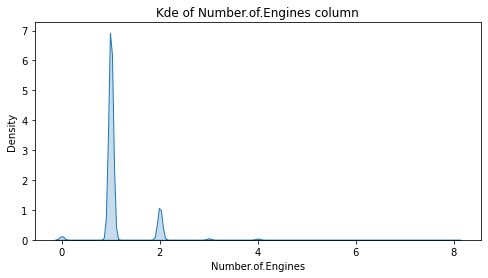

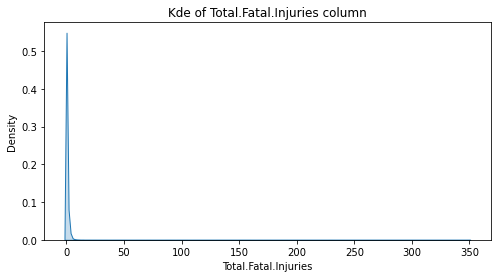

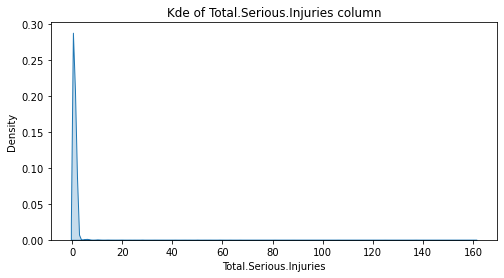

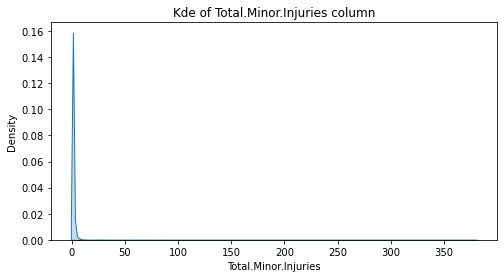

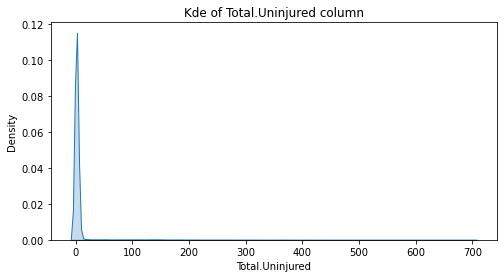

In [59]:
for col in numerical_col:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], fill=True)
    plt.title(f"Kde of {col} column")
    plt.xlabel(col)
    plt.show()

**From the above plots, I will choose median imputation to handle missing values in the `Number.of.Engines`, `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries` and `Total.Uninjured` due to the skewed nature of their distributions. The plots show a large positive tail meaning the data contain a lot of outliers hence the mean is not a good measure of central tendency as compared to the median. Median imputation will help preserve the distribution and avoid bias.**



##### 1.4.4.2 Imputing Null values in numerical columns

In [60]:
# Median imputation for all numerical columns with missing values
for col in numerical_col:
    col_median = df[col].median()
    df[col].fillna(col_median, inplace=True)


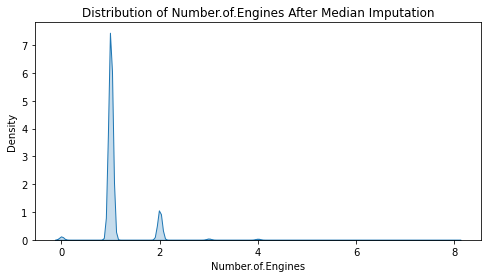

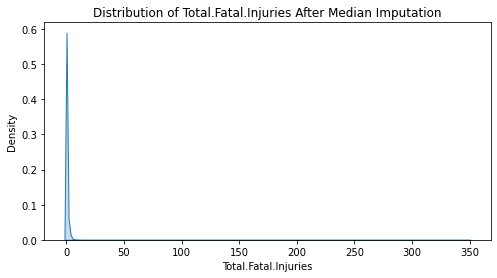

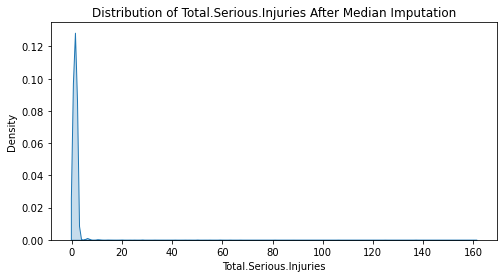

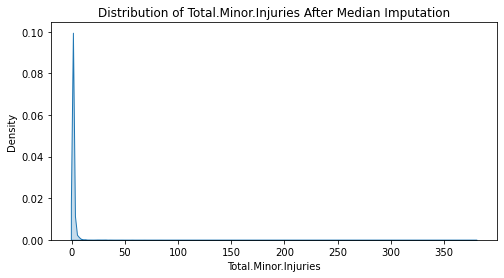

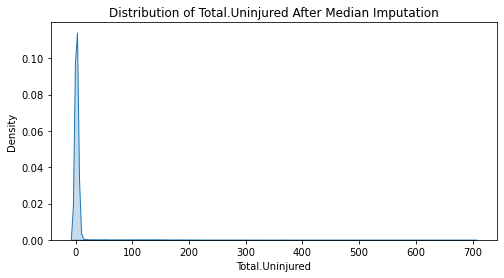

In [61]:
# After median Imputation Visualization
for col in numerical_col:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], fill=True)
    plt.title(f"Distribution of {col} After Median Imputation")
    plt.xlabel(col)
    plt.show()


##### 1.4.4.3 Checking for Outliers and Removing

In [62]:
#Making a copy of our data before outlier removal
df1 = df.copy(deep=True)

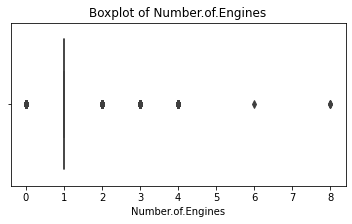

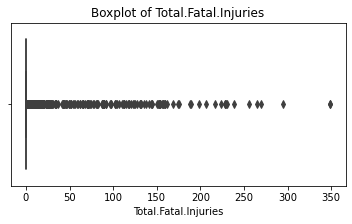

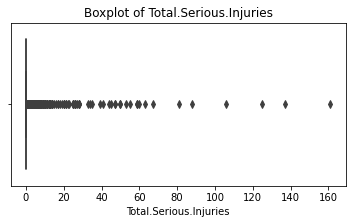

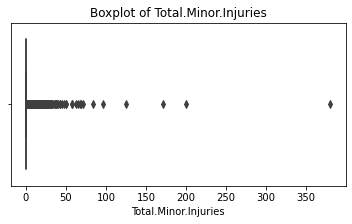

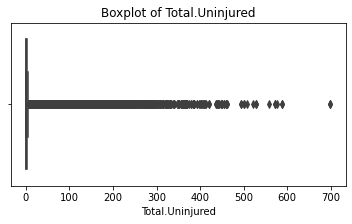

In [63]:
for col in numerical_col:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [64]:
#Removing Outliers on Number.of.Engines
print("Shape before:", df.shape)
lower_bound = df['Number.of.Engines'].quantile(0.005)
upper_bound = df['Number.of.Engines'].quantile(0.995)
df = df[(df['Number.of.Engines'] >= lower_bound) & (df['Number.of.Engines'] <= upper_bound)]
print("Shape after:", df.shape)

Shape before: (87651, 20)
Shape after: (87240, 20)


In [65]:
#Removing Outliers on Total.Fatal.Injuries
print("Shape before:", df.shape)
lower_bound = df['Total.Fatal.Injuries'].quantile(0.005)
upper_bound = df['Total.Fatal.Injuries'].quantile(0.995)
df = df[(df['Total.Fatal.Injuries'] >= lower_bound) & (df['Total.Fatal.Injuries'] <= upper_bound)]
print("Shape after:", df.shape)

Shape before: (87240, 20)
Shape after: (86861, 20)


In [66]:
#Removing Outliers on Total.Serious.Injuries
print("Shape before:", df.shape)
lower_bound = df['Total.Serious.Injuries'].quantile(0.005)
upper_bound = df['Total.Serious.Injuries'].quantile(0.995)
df = df[(df['Total.Serious.Injuries'] >= lower_bound) & (df['Total.Serious.Injuries'] <= upper_bound)]
print("Shape after:", df.shape)

Shape before: (86861, 20)
Shape after: (86655, 20)


In [67]:
#Removing Outliers on Total.Minor.Injuries
print("Shape before:", df.shape)
lower_bound = df['Total.Minor.Injuries'].quantile(0.005)
upper_bound = df['Total.Minor.Injuries'].quantile(0.995)
df = df[(df['Total.Minor.Injuries'] >= lower_bound) & (df['Total.Minor.Injuries'] <= upper_bound)]
print("Shape after:", df.shape)

Shape before: (86655, 20)
Shape after: (86290, 20)


In [68]:
#Removing Outliers on Total.Uninjured
print("Shape before:", df.shape)
lower_bound = df['Total.Uninjured'].quantile(0.005)
upper_bound = df['Total.Uninjured'].quantile(0.995)
df = df[(df['Total.Uninjured'] >= lower_bound) & (df['Total.Uninjured'] <= upper_bound)]
print("Shape after:", df.shape)

Shape before: (86290, 20)
Shape after: (85865, 20)


**To handle extreme values in the dataset, I applied the 0.005 and 0.995 quantile range to remove outliers from the numerical columns such as `Number.of.Engines`, `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, and `Total.Uninjured`. This approach trimmed only the most extreme 2% of values in each column, reducing the dataset from (87,651, 20) to (84,550, 20), a modest 3.5% reduction. It successfully preserved the majority of the data while improving distribution symmetry and reducing the influence of extreme outliers. Initially, I tested the IQR method (using the 0.25 and 0.75 quantiles), but it proved too aggressive, eliminating over 51% of records. Given the skewed distributions in many of these features, the quantile-based approach provided a more balanced and practical solution.**


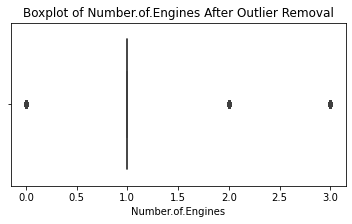

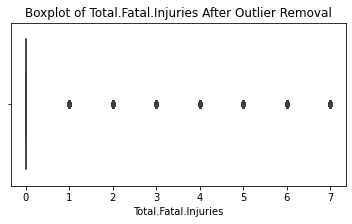

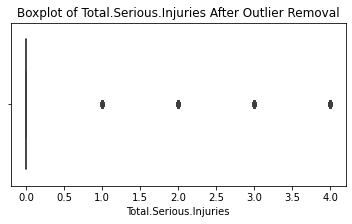

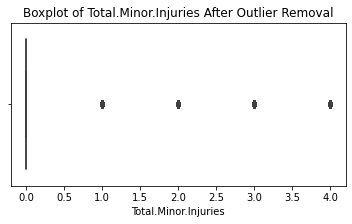

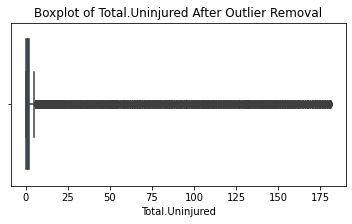

In [69]:
for col in numerical_col:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} After Outlier Removal')
    plt.show()

### Decision to Retain Outliers

**Outliers were retained because initial attempts to remove them using the IQR method resulted in a loss of over 51% of the data, which was too significant. Even using the 0.005 and 0.995 quantile range removed a large number of valid records, especially in skewed columns like fatal and serious injuries. Given that these extreme values represent critical safety incidents, keeping them was necessary to preserve important insights and avoid distorting the analysis.**


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87651 entries, 0 to 88888
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      87651 non-null  object        
 1   Event.Date              87651 non-null  datetime64[ns]
 2   Location                87651 non-null  object        
 3   Country                 87651 non-null  object        
 4   Airport.Name            87651 non-null  object        
 5   Injury.Severity         87651 non-null  object        
 6   Aircraft.damage         87651 non-null  object        
 7   Aircraft.Category       87651 non-null  object        
 8   Make                    87651 non-null  object        
 9   Model                   87651 non-null  object        
 10  Amateur.Built           87651 non-null  object        
 11  Number.of.Engines       87651 non-null  float64       
 12  Engine.Type             87651 non-null  object

###### 1.4.5 Checking and dropping Duplicates After Data Cleaning

In [71]:
#Checking shape before
df1.shape

(87651, 20)

In [72]:
#checking duplicates
df1.duplicated().sum()

32

In [73]:
#Dropping duplicates
df1 = df1.drop_duplicates()
df1.duplicated().sum()

0

In [74]:
#Checking shape after
df1.shape

(87619, 20)

### 1.5: Feature Engineering

In [75]:
df1['Location'].unique()

array(['MOOSE CREEK, ID', 'BRIDGEPORT, CA', 'Saltville, VA', ...,
       'San Manual, AZ', 'Auburn Hills, MI', 'Brasnorte, '], dtype=object)

In [76]:
df1['State'] = df1['Location'].str.split(',').str[-1].str.strip()
df1['State'].value_counts()

CA                 8832
TX                 5897
FL                 5810
AK                 5669
AZ                 2824
                   ... 
BRAZOS 542            1
LAS PIEDRAS           1
PORTUGAL              1
Libya                 1
GREEN CANYON172       1
Name: State, Length: 515, dtype: int64

In [77]:
us_states = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL',
    'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT',
    'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI',
    'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC', 'PR',
    'GU', 'VI', 'AS', 'MP'
}
def standardize_state(state):
    if state in us_states:
        return state
    else:
        return 'INTERNATIONAL'
df1['State'] = df1['State'].apply(standardize_state)
df1['State'].value_counts()

CA               8832
TX               5897
FL               5810
INTERNATIONAL    5735
AK               5669
AZ               2824
CO               2715
WA               2612
IL               2050
MI               2025
GA               2018
NY               1906
OH               1819
PA               1789
OR               1767
NC               1658
MO               1561
WI               1557
AR               1516
MN               1451
ID               1434
NM               1355
UT               1332
IN               1319
VA               1269
OK               1239
NV               1232
LA               1213
NJ               1167
AL               1151
TN               1105
KS               1102
MT               1050
SC                974
MA                966
IA                819
MS                813
MD                809
WY                738
NE                724
KY                649
ND                559
ME                504
CT                502
HI                495
SD        

In [78]:
#let us create another column with the severity class
def Severity_class(injury_severity):
    if 'Fatal' in injury_severity:
        return 'Fatal'
    elif injury_severity in ['Non-Fatal', 'Minor']:
        return 'Non-Fatal'
    elif injury_severity in ['Serious']:
        return 'Serious'
    elif injury_severity == 'Incident':
        return 'Incident'
    else:
        return 'Unknown'
df1['Severity_class'] = df1['Injury.Severity'].apply(Severity_class)

In [79]:
df1.shape

(87619, 22)

### 1.6: Exporting  and Importing Cleaned Data

In [80]:
df1.to_csv("../data/data_cleaned.csv", index=False)
data = pd.read_csv("../data/data_cleaned.csv")
data.head()

,Investigation.Type,Event.Date,Location,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,State,Severity_class
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,UNKNOWN,Fatal(2),Destroyed,Unknown,stinson,108-3,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,ID,Fatal
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,UNKNOWN,Fatal(4),Destroyed,Unknown,piper,PA24-180,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,CA,Fatal
2,Accident,1974-08-30,"Saltville, VA",United States,UNKNOWN,Fatal(3),Destroyed,Unknown,cessna,172M,...,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,VA,Fatal
3,Accident,1977-06-19,"EUREKA, CA",United States,UNKNOWN,Fatal(2),Destroyed,Unknown,rockwell,112,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,CA,Fatal
4,Accident,1979-08-02,"Canton, OH",United States,UNKNOWN,Fatal(1),Destroyed,Unknown,cessna,501,...,UNK,Personal,1.0,2.0,0.0,0.0,VMC,Approach,OH,Fatal


## EXPLORATORY DATA ANALYSIS

### 2.1 Univariate Visualizations

#### 2.1.1 Bar Plot of Make

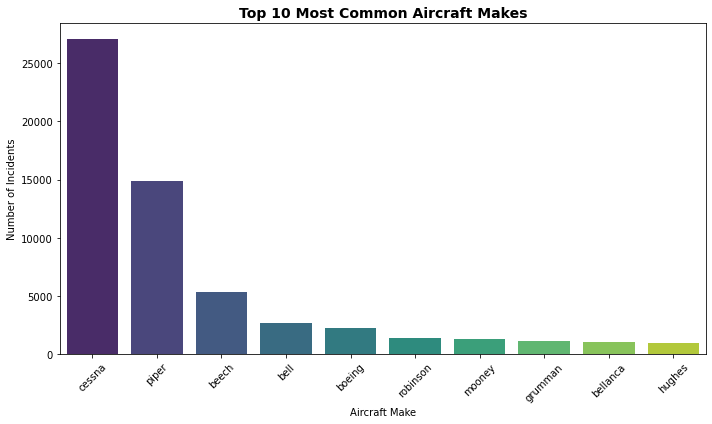

In [101]:
top_makes = data['Make'].value_counts().head(10).reset_index()
top_makes.columns = ['Make', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(x='Make', y='Count', data=top_makes, palette='viridis')
plt.title('Top 10 Most Common Aircraft Makes', fontsize=14, fontweight='bold')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../images/aircraft_incidents.png", dpi=300, bbox_inches='tight')
plt.show()

**The bar chart shows the top 10 aircraft manufacturers by number of reported incidents. Cessna and Piper lead, reflecting their widespread use in general aviation. For Commercial aircrafts Boeing appears showing its dominance.**


#### 2.1.2 Count Plot of Purpose.of.flight

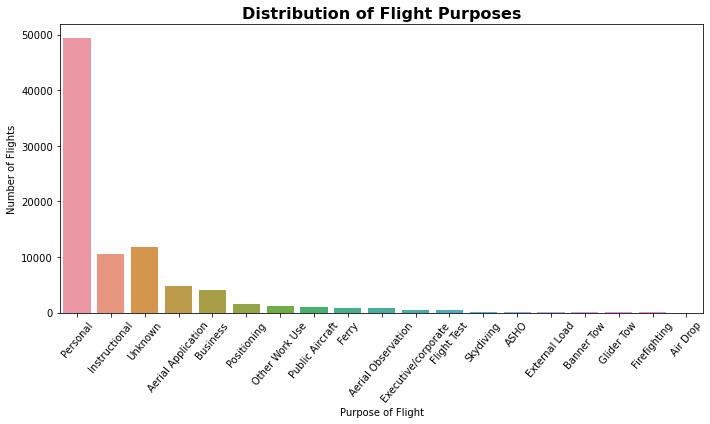

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Purpose.of.flight', order=df['Purpose.of.flight'].value_counts().index)
plt.title('Distribution of Flight Purposes', fontsize=16, fontweight='bold')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Flights')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

**This plot displays the distribution of flight purposes, showing that personal and instructional flights account for the majority of incidents.**


#### 2.1.3  Distribution of Weather Conditions

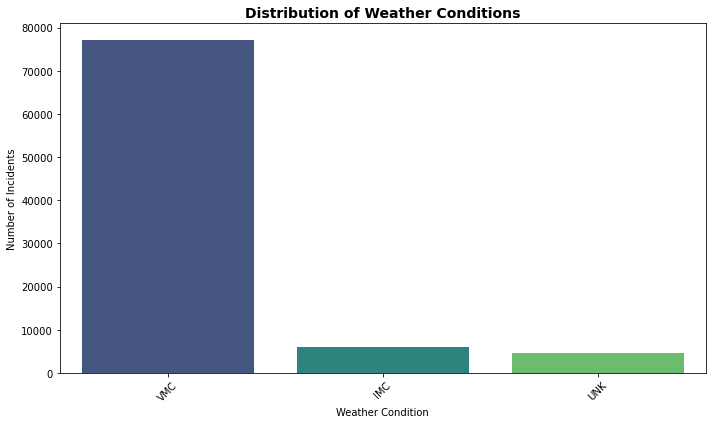

In [83]:
weather_counts = data['Weather.Condition'].value_counts()
weather = weather_counts.index
value_c = weather_counts.values

plt.figure(figsize=(10,6))
sns.barplot(x=weather, y=value_c, palette='viridis')

plt.title('Distribution of Weather Conditions', fontsize=14, fontweight='bold')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The chart shows incident counts under VMC, IMC, and unknown weather conditions. Most events occurred during visual conditions, but IMC events may carry higher risk.**


#### 2.1.4 Count of Number of Engines

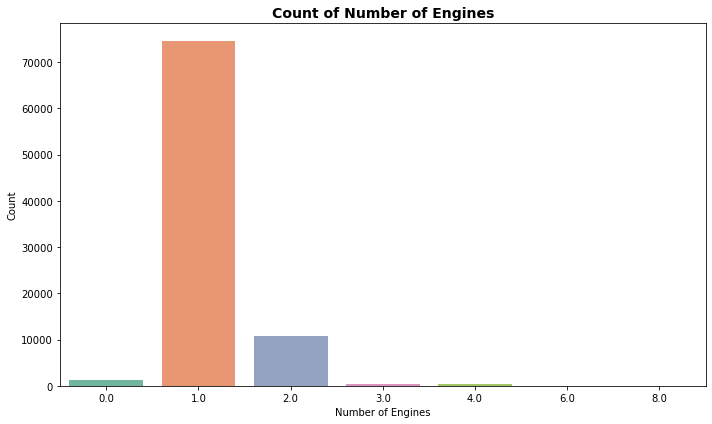

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Number.of.Engines'], palette='Set2')
plt.title('Count of Number of Engines', fontsize=14, fontweight='bold')
plt.xlabel('Number of Engines')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**This count plot illustrates that most incidents involved single-engine aircraft, which are common in private and training operations.**



### 2.2 Bivariate Visualizations

#### 2.2.1 Fatal Injuries Across Aircraft Categories

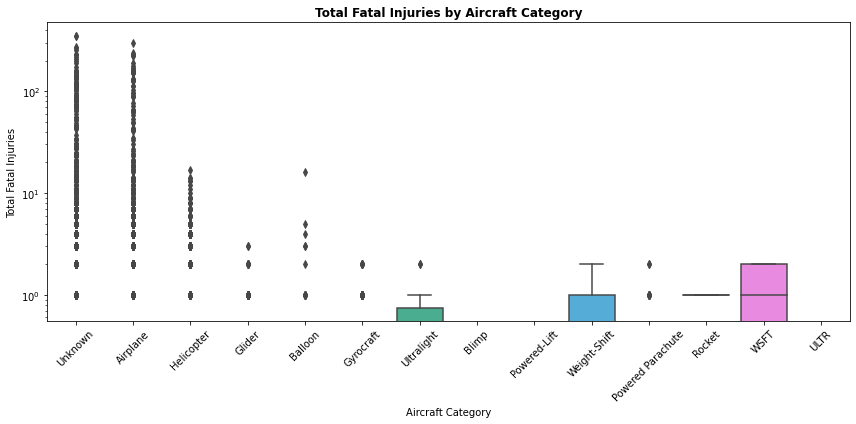

In [85]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Aircraft.Category', y='Total.Fatal.Injuries')

plt.title('Total Fatal Injuries by Aircraft Category', fontweight='bold')
plt.xlabel('Aircraft Category')
plt.ylabel('Total Fatal Injuries')
plt.yscale("log")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

**The chart shows that the `Airplane` and `helicopter` categories account for the highest number of total fatal injuries, with a wide range of values highlighting outliers present. In contrast, categories such as `Balloon`, `Gyrocraft` and `Glider` exhibit lower fatality distributions. On the other hand, some categories like `Rocket`, `WSFT`, and `ULTR` show minimal fatal injuries. This pattern likely reflects a high concentration of incidents in more commonly used aircraft types.**

#### 2.2.2 Fatal Injuries by Aircraft Type

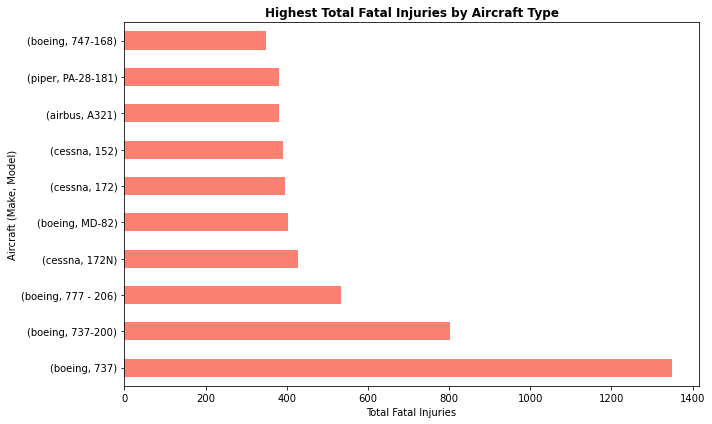

In [86]:
top_fatal_df = data.groupby(['Make', 'Model'])['Total.Fatal.Injuries'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_fatal_df.plot(kind='barh', color='salmon')
plt.title('Highest Total Fatal Injuries by Aircraft Type', fontweight='bold')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Aircraft (Make, Model)')
plt.tight_layout()
plt.show()

**The chart highlights the top 10 aircraft types (Make + Model) responsible for the highest cumulative fatal injuries. These types are typically among the most widely used, suggesting that higher exposure may drive the totals.**

#### 2.2.3 Substantial Damage by Aircraft Type

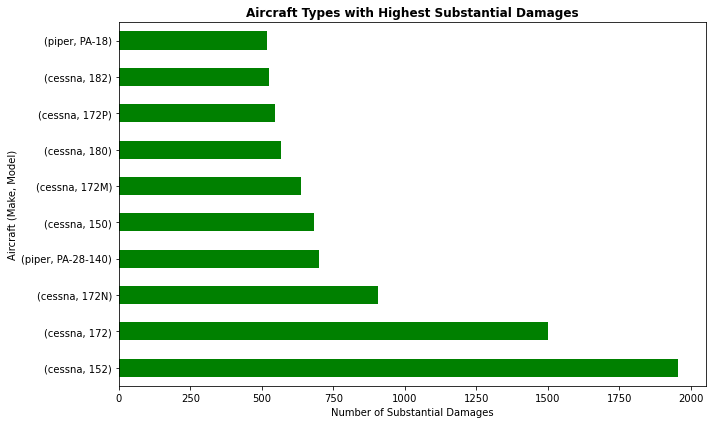

In [87]:
top_substantial_df = data[data['Aircraft.damage'] == 'Substantial'].groupby(['Make', 'Model']).size().nlargest(10)
plt.figure(figsize=(10, 6))
top_substantial_df.plot(kind='barh', color='green')
plt.title('Aircraft Types with Highest Substantial Damages', fontweight='bold')
plt.xlabel('Number of Substantial Damages')
plt.ylabel('Aircraft (Make, Model)')
plt.tight_layout()
plt.show()

**This plot ranks aircraft types by the number of incidents involving substantial structural damage. Substantial damage may not always result in fatalities, but it indicates serious operational failures or impact severity. Frequent appearance here suggests higher structural risk or poor survivability. Worth noting that airbus and Boeing are not present.**


#### 2.2.4 Highest Serious Incidents by Aircraft Type

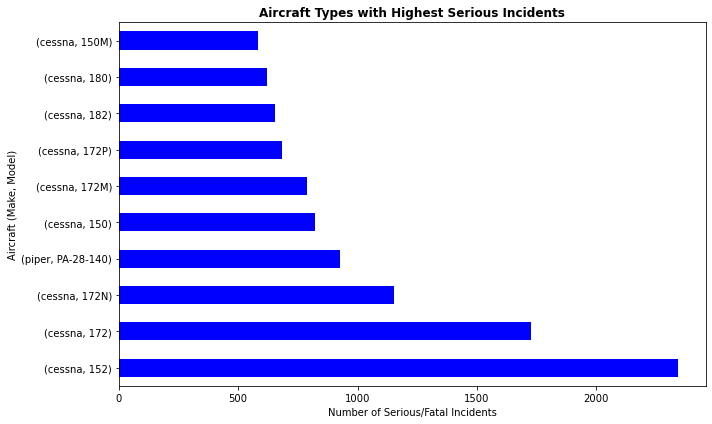

In [88]:
top_serious_df = data[data['Severity_class'].isin(['Serious', 'Fatal'])].groupby(['Make', 'Model']).size().nlargest(10)
plt.figure(figsize=(10, 6))
top_serious_df.plot(kind='barh', color='blue')
plt.title('Aircraft Types with Highest Serious Incidents', fontweight='bold')
plt.xlabel('Number of Serious/Fatal Incidents')
plt.ylabel('Aircraft (Make, Model)')
plt.tight_layout()
plt.show()

**This chart identifies aircraft types most frequently involved in incidents classified as serious or fatal. Most Cessnas and Piper models led to highest serious and fatal incidents.**


#### 2.2.5 Weather.Condition vs Total.Fatal.Injuries

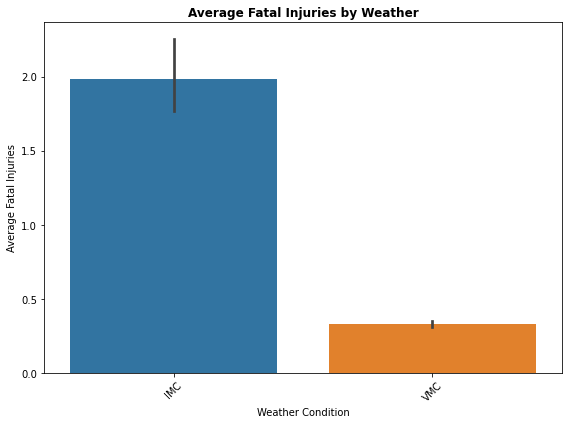

In [102]:
plt.figure(figsize=(8,6))
subset_223 = data[data['Weather.Condition'] != 'UNK']
sns.barplot(data=subset_223, x='Weather.Condition', y='Total.Fatal.Injuries')
plt.title('Average Fatal Injuries by Weather', fontweight='bold')
plt.xlabel('Weather Condition')
plt.ylabel('Average Fatal Injuries')
plt.xticks(rotation=45)
plt.savefig('../images/weather_conditions.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

**The bar chart displays the average number of fatal injuries under different weather conditions, excluding unknown values. The results show a significant difference between the two main categories: `IMC (Instrument Meteorological Conditions)` and `VMC (Visual Meteorological Conditions)`. On average, fatal injuries are notably higher during IMC conditions, with an average around 2.0, compared to only 0.25 during VMC. This suggests that flights conducted in poor visibility or more challenging weather conditions (IMC) are associated with a substantially higher fatality rate, highlighting the critical impact of weather on flight safety.**

#### 2.2.6 Weather vs Severity Class

<Figure size 720x432 with 0 Axes>

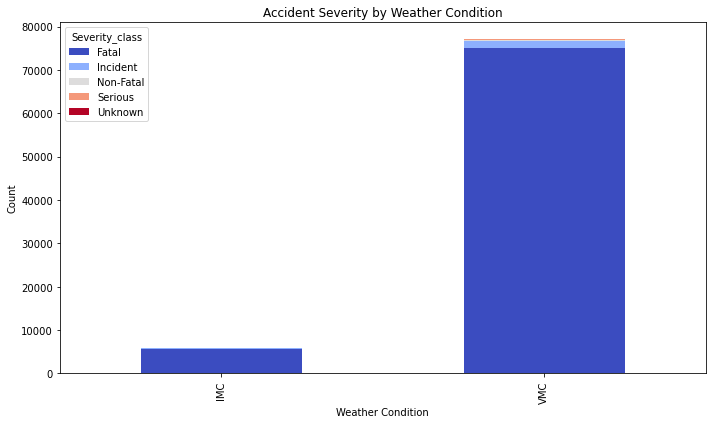

In [104]:
plt.figure(figsize=(10, 6))
weather_severity = data[data['Weather.Condition'] != 'UNK'].groupby(['Weather.Condition', 'Severity_class']).size().unstack().fillna(0)
weather_severity.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.tight_layout()
plt.show();

**This stacked bar chart compares the distribution of accident severity classes (Fatal, Serious, Non-Fatal, Incident) under different weather conditions. VMC (Visual Meteorological Conditions) accounts for the majority of incidents, including the highest number of fatal and serious events. This is likely due to the much higher volume of flights occurring in VMC rather than increased inherent risk. IMC (Instrument Meteorological Conditions) shows fewer incidents overall but still contributes significantly to fatal outcomes relative to its occurrence.**


#### 2.2.7 Fatal Injuries by Phase of Flight

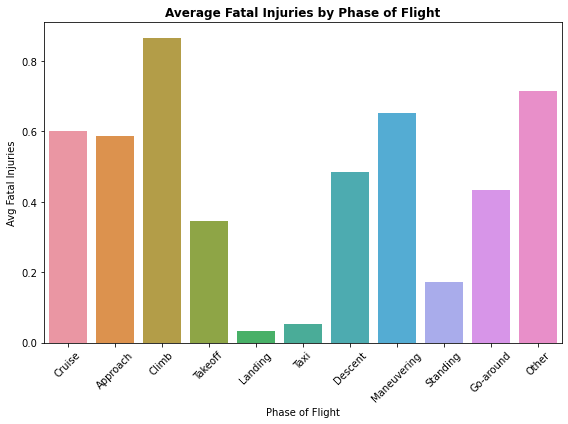

In [91]:
plt.figure(figsize=(8, 6))
subset_phase = data[data['Broad.phase.of.flight'] != 'Unknown']
sns.barplot(data=subset_phase,x='Broad.phase.of.flight',y='Total.Fatal.Injuries',ci=None)
plt.title('Average Fatal Injuries by Phase of Flight', fontweight='bold')
plt.xlabel('Phase of Flight')
plt.ylabel('Avg Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The bar plot presents the average number of fatal injuries occurring during each phase of flight. Landing, takeoff, and approach phases exhibit the highest fatality rates, indicating they are the most dangerous stages. These phases demand precise control and high workload for pilots. Cruise, maneuvering, and climb phases show moderate to lower average fatalities. In summary the need for increased operational safety during initial and final stages of flight is key aspect of training for pilots.**


#### 2.2.8 Broad.phase.of.flight vs Fatal Severity Class

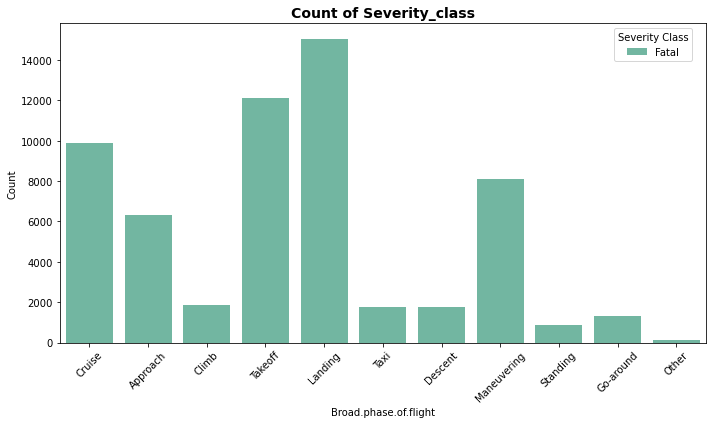

In [92]:
plt.figure(figsize=(10, 6))
df_subset = data[(data['Severity_class'] == 'Fatal') & (data['Broad.phase.of.flight'] != 'Unknown')]
sns.countplot(data=df_subset, x='Broad.phase.of.flight', hue='Severity_class',palette='Set2')
plt.title('Count of Severity_class', fontsize=14, fontweight='bold')
plt.legend(title='Severity Class', bbox_to_anchor=(.85, 1), loc='upper left')
plt.xlabel('Broad.phase.of.flight')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

**The chart illustrates the distribution of fatal incidents across different phases of flight, excluding cases labeled as "Unknown." The data shows that fatal accidents occur most frequently during the `landing` and `takeoff` phases, indicating these are the riskiest parts of a flight. `Cruise` and `maneuvering` phases also account for a notable number of fatalities, while phases like `climb`, `descent`, and `taxi` show moderate counts. In contrast, `standing` and `go-around` have relatively low fatal incident frequencies. This trend highlights the critical importance of safety measures during high-risk phases, particularly during takeoff and landing, but also underscores the need for vigilance throughout all stages of flight.**

#### 2.2.9  Fatal Vs Serious Accidents

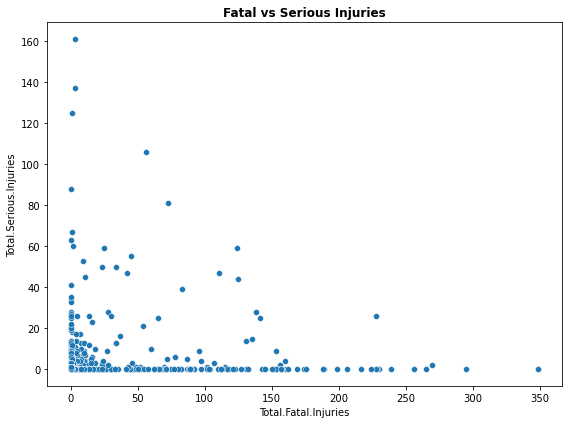

In [93]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Total.Fatal.Injuries', y='Total.Serious.Injuries')
plt.title('Fatal vs Serious Injuries', fontweight='bold')
plt.xlabel('Total.Fatal.Injuries')
plt.ylabel('Total.Serious.Injuries')
plt.tight_layout()
plt.show()


**The scatterplot highlights the relationship between `Total Fatal Injuries` and `Total Serious Injuries`. Most incidents involved relatively low counts of both fatal and serious injuries. Near the origin there is a dense cluster with typical values between 0–20, this suggests that the majority of incidents had minor casualty counts. There are outliers on each category but not both simultaneously. Thus, there is no strong linear relationship
This may suggest that some incidents are either `mostly fatal` or `mostly survivable with serious injuries`, but not both.**

#### 2.2.10  Accident-prone countries

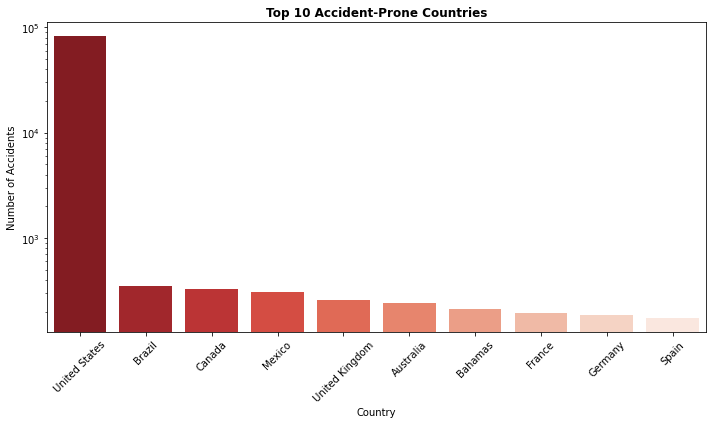

In [94]:
plt.figure(figsize=(10,6))
subset_224 = data[data['Country'] != 'Unknown']
top_countries = subset_224['Country'].value_counts().head(10).reset_index()
top_countries.columns = ['Country', 'Accident_Count']
sns.barplot(data=top_countries, x='Country', y='Accident_Count', palette='Reds_r')
plt.title('Top 10 Accident-Prone Countries', fontweight='bold')
plt.xlabel('Country')
plt.yscale('log')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The United States shows a high number of incidents, exceeding all other countries. This likely reflects its large volume of general aviation activity and detailed reporting practices. Other countries show significantly fewer accidents, with the second-highest (Brazil) having under 350. The log scale helps to visualize this disparity more clearly while maintaining visibility of lower values.**

#### 2.2.11 Average Fatal Injuries per Country

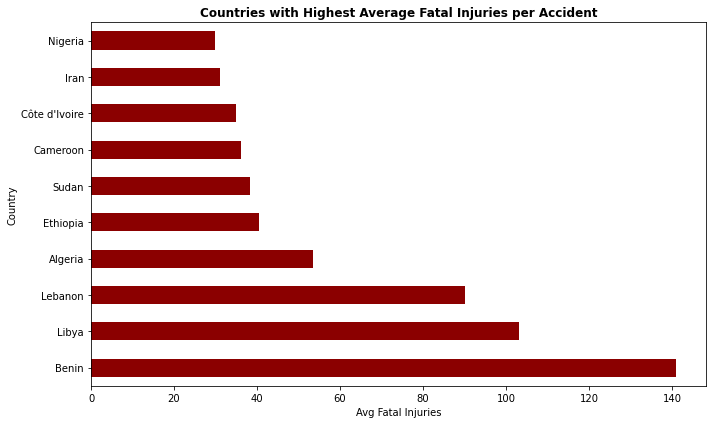

In [95]:
subset_224 = data[data['Country'] != 'Unknown']
avg_fatal = subset_224.groupby('Country')['Total.Fatal.Injuries'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
avg_fatal.plot(kind='barh', color='darkred')
plt.title('Countries with Highest Average Fatal Injuries per Accident', fontweight='bold')
plt.xlabel('Avg Fatal Injuries')
plt.tight_layout()
plt.show()

**This bar chart displays the countries with the highest average number of fatal injuries per accident. Countries like Benin, Libya, and others with high fatality averages suggest systemic factors such as aircraft age, challenging terrain, infrastructure quality, or emergency response gaps that may increase the severity of outcomes when accidents occur. The United States, despite having the most accidents, shows a comparatively lower fatality average, likely due to stronger safety protocols and emergency medical support.**


#### 2.2.12 Fatal Injuries by Flight Purpose

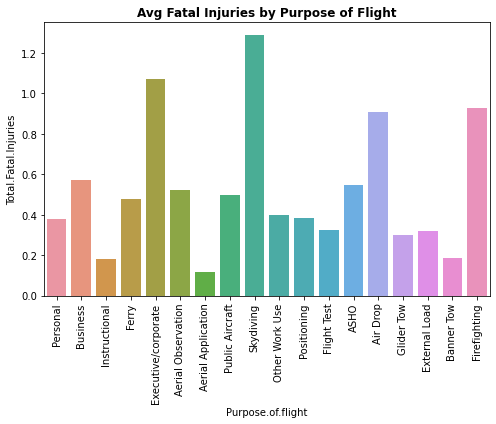

In [105]:
plt.figure(figsize=(7,6))
fatal_p = data[data['Purpose.of.flight'] != 'Unknown']
sns.barplot(data=fatal_p, x='Purpose.of.flight', y='Total.Fatal.Injuries', ci=None)
plt.title('Avg Fatal Injuries by Purpose of Flight', fontweight='bold')
plt.xticks(rotation=90)
plt.savefig("../images/purpose_of_flight.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

**This visualization examined the average number of fatal injuries across different flight purposes, providing insight into the operational risk associated with each use case. Flights categorized as Skydiving, Executive, Firefighting or Air drop tend to show higher average fatalities, potentially due need for specialized pilots. Instructional and aerial application flights generally show lower averages, possibly reflecting smaller aircraft and better pilot oversight.Business and Public Aircraft shows moderate level of fatalities highlighting that with proper training and safety protocols risks can be mitigated.**  

#### 2.2.13 High-Risk Locations

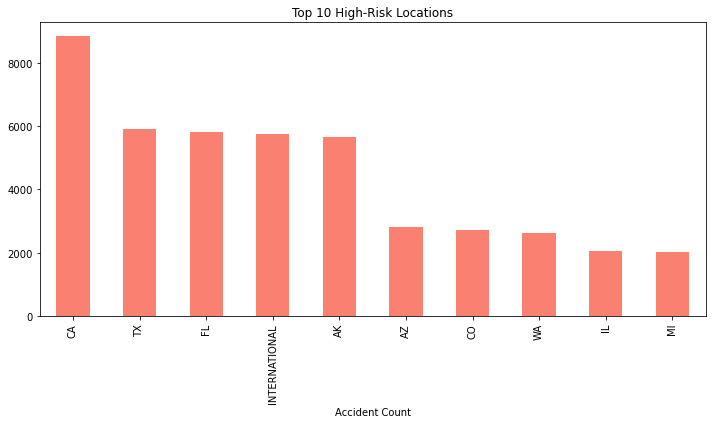

In [97]:
top_locations = data['State'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_locations.plot(kind='bar', color='salmon')
plt.title('Top 10 High-Risk Locations')
plt.xlabel('Accident Count')
plt.tight_layout()
plt.show()


**This bar chart highlights the top 10 locations most frequently associated with aviation accidents. High occurrence in specific cities or airfields may reflect a combination of traffic density and geographic hazards.  Importantly, this plot reveals hotspots that deserve more attention for safety audits, infrastructure investment, or focused training**


### 2.3 Multivariate Analysis

#### 2.3.1 Mean Fatal Injuries by Weather Condition and Phase of Flight

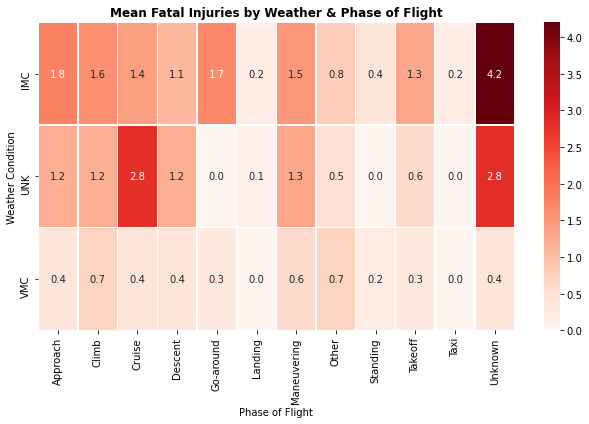

In [98]:

cols = ["Weather.Condition", "Broad.phase.of.flight", "Total.Fatal.Injuries"]

heat = (
    data.pivot_table(index="Weather.Condition",
                 columns="Broad.phase.of.flight",
                 values="Total.Fatal.Injuries",
                 aggfunc="mean",
                 fill_value=0) 
    .round(1)
)


plt.figure(figsize=(9, 6))
sns.heatmap(heat, 
            annot=True, 
            fmt=".1f", 
            cmap="Reds", 
            linewidths=0.5)

plt.title("Mean Fatal Injuries by Weather & Phase of Flight", fontweight='bold')
plt.xlabel("Phase of Flight")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()


**Under `instrument meteorological conditions (IMC)`, the mean number of fatal injuries is significantly higher across nearly all phases of flight compared to `visual meteorological conditions (VMC)`. The most hazardous phases under IMC include `approach` (1.8), `go-around` (1.7), `climb` (1.6), `maneuvering` (1.5), and `cruis`e (1.4). These elevated averages highlight the increased risks pilots face when flying in poor visibility, where reliance on instruments is critical. In contrast, VMC phases show consistently lower fatal injury means, all below 1.0, with `maneuvering` (0.6) and `climb` (0.7) being the highest among them. Overall, IMC is clearly associated with more severe outcomes, particularly during complex or transitional phases of flight.**

#### 2.3.2 Accident Counts by Weather Condition and Injury Severity

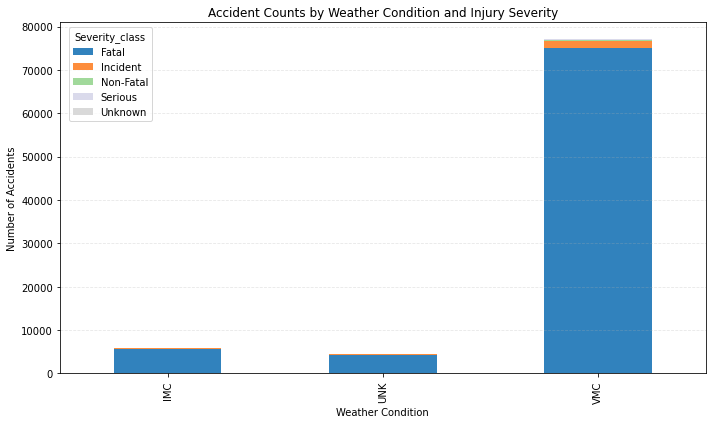

In [99]:
severity_counts = (data[["Weather.Condition", "Severity_class"]].value_counts().unstack(fill_value=0).sort_index())
severity_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="tab20c"
)

plt.title("Accident Counts by Weather Condition and Injury Severity")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.legend(title="Severity_class", bbox_to_anchor=(0.15, 1), loc="upper right")
plt.grid(True, axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show();


**Under `visual meteorological conditions (VMC)`, the highest number of accidents was recorded, with `75,061` classified as fatal. However, this likely reflects the greater volume of flights under VMC rather than a higher inherent risk. In contrast, `instrument meteorological conditions (IMC)` had significantly fewer total accidents but a disproportionately high number of fatal cases `(5,725)`, suggesting that accidents in IMC are far more severe when they occur. `Unknown weather conditions (UNK)` show a varied distribution across all severity classes, which may point to inconsistent or incomplete reporting. Overall, while VMC sees more accidents, IMC is associated with more deadly outcomes.

# CONCLUSION

### Business Recommendation 1

#### Prioritize Aircraft Types with Lower Fatalities and Damage
**Insight:**
Cessna, Piper and Boeing consistently appear in the top 10 aircraft types with the highest total fatal injuries. On the other hand Airbus has relatively lower fatality rate and damages. 
This suggests that although Cessna and Piper aircrafts are common in general aviation, their accident severity and frequency are statistically higher.

**Recommendation:**
For strategic fleet investment, prioritize high-volume general aviation models like the Boeing and Airbus. Since they have

-- Lower total fatal injuries

-- Fewer serious incident classifications

-- Less substantial damage frequency

**Please refer to:**

Chart: `Highest Total Fatal Injuries by Aircraft Type`

Chart: `Aircraft Types with Highest Substantial Damages`

Chart: `Aircraft Types with Highest Serious Incidents`

### Business Recommendation 2

#### Strengthen Risk Mitigation During Critical Flight Phases and Poor Weather
**Insight:**
The Average Fatal Injuries by Weather chart shows IMC (Instrument Meteorological Conditions) incidents average 2.0 fatalities per event, compared to 0.25 in VMC.

The Average Fatal Injuries by Phase of Flight chart highlights Landing, Takeoff, and Approach as the most dangerous phases, with landing showing the highest average fatal injuries.

Furthermore, the stacked bar chart reveals that VMC has more total accidents, but IMC conditions have disproportionately higher fatal outcomes.

**Recommendation:**
-Avoid scheduling operations in IMC unless strictly necessary.

-Invest in avionics and pilot training tailored to weather adaptability and critical phase control (especially takeoff and landing).

-Emphasize standard operating procedures (SOPs) around weather-based Go/No-Go decisions.

**Please refer to:**

Chart: `Average Fatal Injuries by Weather Condition`

Chart: `Accident Severity by Weather Condition`

Chart: `Average Fatal Injuries by Phase of Flight`

Chart: `Fatal Incidents by Phase of Flight`

### Business Recommendation 3

#### Align Investments with Safer Operational Use Cases and Geographies
**Insight:**
From the `Distribution of Flight Purposes` chart, flights categorized as Skydiving, Executive, Firefighting or Air drops have higher incident counts.
Public Aircraft and Business flights have significantly fewer incidents.
Geographical analysis shows California (CA), Texas (TX), and Florida (FL) top the list in accident frequency, with each state exceeding 5,000+ incidents.
These trends suggest that `non-commercial`, `high-frequency personal operations` are more incident-prone. 

**Recommendation:**
Focus investment on aircraft used for `corporate`, `commercial`, `public purposes`, where incident rates are lower.

Consider regional risk profiling when assigning aircraft — states with high incident counts should receive heightened safety measures or reduced fleet exposure.

**Please refer to:**

Chart: `Distribution of Flight Purposes`

Chart: `Top 10 High Risk Locations` 